In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('/home/oleksii/projects/ohif-orthanc-postgres-docker/datasets/2_classification/prostate_class_dataset_demography_final_psa_vol_20240418.csv', sep=';')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   study_orthanc_id   4479 non-null   object 
 1   PatientID          4479 non-null   object 
 2   class              4479 non-null   object 
 3   GS                 2851 non-null   object 
 4   csPCa              4479 non-null   bool   
 5   GS_order           4479 non-null   float64
 6   class_order        4011 non-null   float64
 7   PatientBirthDate   4479 non-null   object 
 8   PatientSize        3050 non-null   float64
 9   PatientWeight      4441 non-null   float64
 10  StudyDate          4479 non-null   object 
 11  PatientAgeAtStudy  4479 non-null   float64
 12  ALTAPatientID      4479 non-null   int64  
 13  psa                3958 non-null   object 
 14  freePSA            3837 non-null   object 
 15  ratioPSA           3837 non-null   object 
 16  CRP                3824 

In [5]:
dataset.describe()

,GS_order,class_order,PatientSize,PatientWeight,PatientAgeAtStudy,ALTAPatientID,volume_pz,volume_tz
count,4479.000000,4011.000000,3050.000000,4441.000000,4479.000000,4.479000e+03,4479.000000,4479.000000
mean,1.874526,3.452755,1.910321,88.503040,66.184360,2.398358e+04,16.346680,37.278743
std,1.955369,1.465462,4.563121,12.086976,7.844857,1.749234e+05,5.210515,28.019004
min,0.000000,0.000000,0.800000,50.000000,34.600000,1.900000e+02,0.000000,0.000000
25%,0.000000,3.000000,1.750000,80.000000,60.835000,1.339750e+04,12.810000,17.975000
50%,1.000000,4.000000,1.800000,90.000000,66.330000,1.877200e+04,15.910000,28.280000
75%,3.000000,4.000000,1.830000,95.000000,71.640000,2.639000e+04,19.150000,47.150000
max,7.000000,6.000000,180.000000,152.000000,122.870000,1.026554e+07,39.740000,329.200000


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 11.8 MB/s eta 0:00:00
DEPRECATION: torch-tensorrt 1.3.0a0 has a non-standard dependency specifier torch<1.14.0,>=1.12.0+cu113. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torch-tensorrt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [17]:
bmi_df = pd.read_excel("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/clinical_param/BMI Liste.xlsx")
psa_full = pd.read_csv("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/clinical_param/PSA_only_Timeseries_dataset.csv")
psa_free = pd.read_csv("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/clinical_param/PSA_Timeseries_dataset.csv")
dicom_meta_data = pd.read_csv("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/clinical_param/meta_pacs_inst.csv", sep=";")

image_data = pd.read_csv("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/classes_with_dicoms.csv", sep=";")

In [35]:
image_data

,ALTA_ID_x,Befunddatum,StudyDate_x,File Origin,Typ,Anzahl MRT,Anzahl Biopsie,Gleason,Verwenden?,Klasse,...,carcinoma,tumour-free,HGPIN,csPCa,GS6,GS7a,GS7b,GS8,GS9_10,Segmented
0,223,20.01.09,20.01.09 00:00,Ab_000223_200109_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,True,False,False,False,False,False,False,False,False
1,308,15.09.20,15.09.20 00:00,mrpro2_000308_150920_0001.docx,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,True,False,False,False,False,False,False,False,False
2,786,26.10.20,26.10.20 00:00,mrpro3_000786_261020_0001.docx,Verlaufs-MRT,2.0,1.0,6,ja,karzinom,...,True,False,False,False,True,False,False,False,False,True
3,892,17.09.12,14.09.12 00:00,ab_000892_170912_0001.doc,Erste MRT,1.0,1.0,0,ja,chronische entzündung,...,False,False,False,False,False,False,False,False,False,True
4,926,10.09.14,09.09.14 00:00,ab_000926_100914_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,31212,07.09.21,07.09.21 00:00,mrpro3_031212_070921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom,...,True,False,False,True,False,True,False,False,False,False
3995,31251,13.09.21,10.09.21 00:00,mrpro4_031251_130921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom + high grade pin,...,True,False,True,True,False,True,False,False,False,False
3996,31256,14.09.21,13.09.21 00:00,mrpro3_031256_140921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,True,False,False,False,True,False,False,False,False,False
3997,31284,15.09.21,15.09.21 00:00,mrpro4_031284_150921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,True,False,False,False,True,False,False,False,False,False


In [18]:
klassenliste = pd.read_excel("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/Klassenliste für Oleksii.xlsx")

In [4]:
# prepare dicom_meta data
dicom_meta_data['StudyDate'] = pd.to_datetime(dicom_meta_data['StudyDate'], format="%Y%m%d")
# clean inconsistencies
dicom_meta_data.loc[dicom_meta_data["PatientSize"] > 2.5, "PatientSize"] = dicom_meta_data["PatientSize"]/100
dicom_meta_data['PatientID'] = dicom_meta_data['PatientID'].astype('str')

In [5]:
# interpolate interpatients data
rows = []
for patient in dicom_meta_data['PatientName'].unique():
    row = dicom_meta_data[dicom_meta_data['PatientName'] == patient]
    row_copy = row.copy()

    if len(row_copy) > 1:
        missing_patient_size = row_copy["PatientSize"].isnull()
        if missing_patient_size.any():
            available_patient_size = row_copy[~missing_patient_size]["PatientSize"].tolist()
            if available_patient_size:
                mode_patient_size = stats.mode(available_patient_size)[0][0]
                row_copy.loc[:, "PatientSize"] = mode_patient_size
            
        missing_patient_weight = row_copy["PatientWeight"].isnull()
        if missing_patient_weight.any():
            available_patient_weight = row_copy[~missing_patient_weight]["PatientWeight"].tolist()           
            if available_patient_weight:
                avg_patient_size = np.mean(available_patient_weight)
                row_copy.loc[missing_patient_weight, "PatientWeight"] = avg_patient_size
    
#     row_copy["PatientID"]
#     print(row_copy["PatientID"].tolist())
#     print("|".join(row_copy["PatientID"].tolist()))
    row_copy.loc[:, "PatientIDExtended"] = "|".join(row_copy["PatientID"].tolist())
#     break
    rows.append(row_copy)
dicom_meta_data_filled = pd.concat(rows)

In [6]:
dicom_meta_data_alta = pd.read_csv("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/clinical_param/meta_pacs_alta_id.csv", sep=";")
dicom_meta_data_alta = dicom_meta_data_alta[['StudyInstanceUID', 'ALTA ID']]
dicom_meta_data_alta_merged = pd.merge(
    dicom_meta_data_filled,
    dicom_meta_data_alta,
    how="left",
    on='StudyInstanceUID',
)
cond = dicom_meta_data_alta_merged["ALTA ID"].isna() & dicom_meta_data_alta_merged["InstitutionName"].str.lower().str.contains('|'.join(["lumiani", "alta"]))
dicom_meta_data_alta_merged.loc[cond, "ALTA ID"] = dicom_meta_data_alta_merged[cond]['PatientID']

dicom_meta_data_alta_merged = dicom_meta_data_alta_merged[~dicom_meta_data_alta_merged['ALTA ID'].isna()]
dicom_meta_data_alta_merged = dicom_meta_data_alta_merged[~(dicom_meta_data_alta_merged['ALTA ID'] == "#NV")]
dicom_meta_data_alta_merged = dicom_meta_data_alta_merged[~dicom_meta_data_alta_merged['StudyDate'].isna()]

In [7]:
dicom_meta_data_alta_merged

,InstitutionName,PatientAge,PatientBirthDate,PatientID,PatientName,PatientSize,PatientWeight,StudyDate,StudyInstanceUID,PatientIDExtended,ALTA ID
0,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",055Y,19660416,26586,Zirngibl^Thomas,1.87,93.0,2022-02-01,1.3.12.2.1107.5.2.19.145132.300000220201065038...,26586|26586,26586
1,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",053Y,19660416,26586,Zirngibl^Thomas,1.87,93.0,2019-11-14,1.3.12.2.1107.5.2.19.145132.300000191114071420...,26586|26586,26586
2,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",068Y,19530401,31906,Ständer^Ralf,1.80,135.0,2022-02-01,1.3.12.2.1107.5.2.19.145132.300000220201065038...,31906|31906,31906
3,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",068Y,19530401,31906,Ständer^Ralf,1.80,135.0,2022-02-01,1.3.12.2.1107.5.2.19.145132.300000220201065038...,31906|31906,31906
4,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",067Y,19541206,32266,Schep^Jan,1.93,95.0,2022-02-01,1.3.12.2.1107.5.2.19.145132.300000220201065038...,32266,32266
...,...,...,...,...,...,...,...,...,...,...,...
11073,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",071Y,19471106,26651,Endres^Manfred,1.90,105.0,2019-10-29,1.3.12.2.1107.5.2.19.145132.300000191029064641...,26651,26651
11078,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",057Y,19620411,26669,Krummacker^Andreas,1.85,120.0,2019-10-31,1.3.12.2.1107.5.2.19.145132.300000191031071221...,26669,26669
11079,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",073Y,19460404,26672,Renkert^Karl,1.80,85.0,2019-10-31,1.3.12.2.1107.5.2.19.145132.300000191031071221...,26672,26672
11080,"ALTA Klinik Bielefeld, Dr. med. A. Lumiani",056Y,19630511,17042,Oberhofer^Olaf^^Dr.med.dent.,1.88,88.0,2019-10-31,1.3.12.2.1107.5.2.19.145132.300000191031071221...,17042,17042


In [9]:
image_data['ALTA_ID_x'] = image_data['ALTA_ID_x'].astype(str)

In [15]:
dicom_meta_data_alta_merged['ALTA ID'] == '223'

0        False
1        False
2        False
3        False
4        False
         ...  
11073    False
11078    False
11079    False
11080    False
11081    False
Name: ALTA ID, Length: 10639, dtype: bool

In [10]:
# get closest metainfo. otherwise ignore. 
rows = []
for index, row in image_data.iterrows():

    tmp_series = dicom_meta_data_alta_merged[dicom_meta_data_alta_merged['ALTA ID'] == row['ALTA_ID_x']]
    diff = row['StudyDate_x'] - tmp_series['StudyDate']
    diff_list = diff.tolist()    

#     print(tmp_series['PatientWeight'].tolist(), tmp_series['PatientSize'].tolist(), tmp_series['PatientID'].tolist())    
#     print(diff.tolist())

    row_meta = row.copy()
    if len(diff_list) > 0:
        diff_days = np.array([abs(i.days) for i in diff_list])
        tmp_series['date_diff'] = diff_days
        closes_item = tmp_series['date_diff'].idxmin()       
        row_meta["PatientSize"] = tmp_series.loc[closes_item,:]['PatientSize']
        row_meta["PatientWeight"] =  tmp_series.loc[closes_item,:]['PatientWeight']
        row_meta["PatientBirthDateMeta"] =  tmp_series.loc[closes_item,:]['PatientBirthDate']
    else:
        row_meta["PatientBirthDateMeta"] = None
        row_meta["PatientSize"] = None
        row_meta["PatientWeight"] = None
    
    
    rows.append(row_meta)
image_data_psa_bmi = pd.DataFrame(rows)

TypeError: unsupported operand type(s) for -: 'DatetimeArray' and 'str'

In [ ]:
image_data_psa_bmi

In [8]:
# prepare BMI data
bmi_df = pd.read_excel("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/clinical_param/BMI Liste.xlsx")
bmi_df['StudyDate'] = pd.to_datetime(bmi_df['StudyDate'], format="%Y%m%d")

# clean nans
# bmi_df_filtered = bmi_df[~bmi_df["PatientSize"].isna() & ~bmi_df["PatientWeight"].isna()]
bmi_df_filtered = bmi_df.copy()

bmi_df_filtered["PatientSize"] = bmi_df_filtered["PatientSize"].str.replace("'", "")
bmi_df_filtered["PatientSize"] = bmi_df_filtered["PatientSize"].str.replace("\"", "")
bmi_df_filtered["PatientSize"] = bmi_df_filtered["PatientSize"].astype('float')
bmi_df_filtered.loc[bmi_df_filtered["PatientSize"] > 2.3, "PatientSize"] = bmi_df_filtered["PatientSize"]/100
bmi_df_filtered = bmi_df_filtered[bmi_df_filtered["PatientSize"] > 1.5]


bmi_df_filtered["PatientWeight"] = bmi_df_filtered["PatientWeight"].str.replace("\"", "")
bmi_df_filtered["PatientWeight"] = bmi_df_filtered["PatientWeight"].astype('float')
bmi_df_filtered = bmi_df_filtered[bmi_df_filtered["PatientWeight"] > 50]

In [9]:
bmi_df_filtered

,InstitutionName,StudyDate,PatientID,PatientBirthDate,PatientSize,PatientWeight
0,Zentrum für innovative Radiologie,2019-11-15,6603,19460819.0,1.80,80.0
1,VISIORAD Pinneberg Bismarckstr.,2017-03-22,600070179,19370405.0,1.77,77.0
3,Vassilios Karakidis,2018-08-13,65273,19401006.0,1.75,76.0
5,Vassilios Karakidis,2019-07-09,846,19510310.0,1.85,94.0
7,Universitaetsklinikum Regensburg,2019-09-06,1307332,19610302.0,1.74,70.0
...,...,...,...,...,...,...
12937,Dr. med. A. Lumiani,2014-07-29,801,19480829.0,1.70,90.0
12938,ALTA Klinik Bielefeld,2017-10-23,786,19491231.0,1.78,90.0
12943,Dr. med. A. Lumiani,2014-04-28,165,19520904.0,1.80,89.0
12947,Dr. med. A. Lumiani,2016-07-11,19992,19540125.0,1.77,71.0


In [62]:
image_data['StudyDate_x'] = pd.to_datetime(image_data['StudyDate_x'])
# image_data_matched['StudyDate_x'] = image_data_matched['StudyDate_x'].dt.strftime('%Y%m%d')
psa_full['date'] = pd.to_datetime(psa_full['date'])

In [11]:
image_data

,ALTA_ID_x,Befunddatum,StudyDate_x,File Origin,Typ,Anzahl MRT,Anzahl Biopsie,Gleason,Verwenden?,Klasse,...,carcinoma,tumour-free,HGPIN,csPCa,GS6,GS7a,GS7b,GS8,GS9_10,Segmented
0,223,20.01.09,2009-01-20,Ab_000223_200109_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,True,False,False,False,False,False,False,False,False
1,308,15.09.20,2020-09-15,mrpro2_000308_150920_0001.docx,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,True,False,False,False,False,False,False,False,False
2,786,26.10.20,2020-10-26,mrpro3_000786_261020_0001.docx,Verlaufs-MRT,2.0,1.0,6,ja,karzinom,...,True,False,False,False,True,False,False,False,False,True
3,892,17.09.12,2012-09-14,ab_000892_170912_0001.doc,Erste MRT,1.0,1.0,0,ja,chronische entzündung,...,False,False,False,False,False,False,False,False,False,True
4,926,10.09.14,2014-09-09,ab_000926_100914_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,31212,07.09.21,2021-07-09,mrpro3_031212_070921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom,...,True,False,False,True,False,True,False,False,False,False
3995,31251,13.09.21,2021-10-09,mrpro4_031251_130921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom + high grade pin,...,True,False,True,True,False,True,False,False,False,False
3996,31256,14.09.21,2021-09-13,mrpro3_031256_140921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,True,False,False,False,True,False,False,False,False,False
3997,31284,15.09.21,2021-09-15,mrpro4_031284_150921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,True,False,False,False,True,False,False,False,False,False


In [12]:
# get the closes PSA value
rows = []
for index, row in image_data.iterrows():
    tmp_series = psa_full[psa_full['ID'] == row['ALTA_ID_x']]
    diff = row['StudyDate_x'] - tmp_series['date']
    diff_list = diff.tolist()

    row_meta = row.copy()
    if len(diff_list) > 0:

        diff_days = np.array([abs(i.days) for i in diff_list])
        tmp_series['date_diff'] = diff_days
        
        closes_item = tmp_series['date_diff'].idxmin()
        prev = closes_item - 1
        prev_prev = closes_item - 2
        
        if prev in tmp_series.index:            
            row_meta["PSA_value"] = tmp_series.loc[closes_item, :]['value']
            row_meta["PSA_value_prev"] = tmp_series.loc[closes_item - 1, :]['value']
    
            #         row_meta["freePSA_value"] = tmp_series.loc[closes_item,:]['freePSA_interp']
            row_meta["age"] =  tmp_series.loc[closes_item, :]['age']
            row_meta["age_prev"] =  tmp_series.loc[closes_item - 1, :]['age']
        else:
            row_meta["PSA_value"] = None
            row_meta["PSA_value_prev"] = None

            row_meta["age"] = None
            row_meta["age_prev"] = None

        if prev_prev in tmp_series.index:
            row_meta["PSA_value_prev_prev"] = tmp_series.loc[closes_item - 2, :]['value']
            row_meta["age_prev_prev"] =  tmp_series.loc[closes_item - 2, :]['age']
        else:
            row_meta["PSA_value_prev_prev"] = None
            row_meta["age_prev_prev"] = None

    else:
        row_meta["PSA_value"] = None
        row_meta["PSA_value_prev"] = None
        
        row_meta["PSA_value_prev_prev"] = None
        row_meta["age_prev_prev"] = None

        row_meta["age"] = None
        row_meta["age_prev"] = None
    rows.append(row_meta)

image_data_psa = pd.DataFrame(rows)
image_data_psa.reset_index(drop=True, inplace=True)

/tmp/ipykernel_244/3309160988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_series['date_diff'] = diff_days


In [13]:
image_data_psa

,ALTA_ID_x,Befunddatum,StudyDate_x,File Origin,Typ,Anzahl MRT,Anzahl Biopsie,Gleason,Verwenden?,Klasse,...,GS7b,GS8,GS9_10,Segmented,PSA_value,PSA_value_prev,PSA_value_prev_prev,age_prev_prev,age,age_prev
0,223,20.01.09,2009-01-20,Ab_000223_200109_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,308,15.09.20,2020-09-15,mrpro2_000308_150920_0001.docx,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,786,26.10.20,2020-10-26,mrpro3_000786_261020_0001.docx,Verlaufs-MRT,2.0,1.0,6,ja,karzinom,...,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
3,892,17.09.12,2012-09-14,ab_000892_170912_0001.doc,Erste MRT,1.0,1.0,0,ja,chronische entzündung,...,False,False,False,True,6.27,5.32,6.19,66.005479,66.293151,66.172603
4,926,10.09.14,2014-09-09,ab_000926_100914_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,31212,07.09.21,2021-07-09,mrpro3_031212_070921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3995,31251,13.09.21,2021-10-09,mrpro4_031251_130921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom + high grade pin,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3996,31256,14.09.21,2021-09-13,mrpro3_031256_140921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3997,31284,15.09.21,2021-09-15,mrpro4_031284_150921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# # get the closes PSA value
# rows = []
# for index, row in image_data.iterrows():
#     tmp_series = psa_full[psa_full['ID'] == row['ALTA_ID_x']]
#     diff = row['StudyDate_x'] - tmp_series['date']
#     diff_list = diff.tolist()

#     row_meta = row.copy()
#     if len(diff_list) > 0:

#         diff_days = np.array([abs(i.days) for i in diff_list])
#         tmp_series['date_diff'] = diff_days

#         closes_item = tmp_series['date_diff'].idxmin()
#         row_meta["PSA_value"] = tmp_series.loc[closes_item,:]['value']
# #         row_meta["freePSA_value"] = tmp_series.loc[closes_item,:]['freePSA_interp']
#         row_meta["age"] =  tmp_series.loc[closes_item,:]['age']
#     else:
#         row_meta["PSA_value"] = None
# #         row_meta["freePSA_value"] = None
#         row_meta["age"] = None
#     rows.append(row_meta)

# image_data_psa = pd.DataFrame(rows)
# image_data_psa.reset_index(drop=True, inplace=True)

In [14]:
print("{}-cases were matched with PSA ".format(len(image_data_psa[~image_data_psa["PSA_value"].isnull()])))
print("{}-after,  {}-before ".format(len(image_data_psa), len(image_data)))

2910-cases were matched with PSA 
3999-after,  3999-before 


In [51]:
# get closest metainfo. otherwise ignore. 
rows = []
for index, row in image_data_psa.iterrows():

    tmp_series = bmi_df_filtered[bmi_df_filtered['PatientID'] == row['ALTA_ID_x']]
    diff = row['StudyDate_x'] - tmp_series['StudyDate']
    diff_list = diff.tolist()    

#     print(tmp_series['PatientWeight'].tolist(), tmp_series['PatientSize'].tolist(), tmp_series['PatientID'].tolist())    
#     print(diff.tolist())

    row_meta = row.copy()
    if len(diff_list) > 0:
        diff_days = np.array([abs(i.days) for i in diff_list])
        tmp_series['date_diff'] = diff_days
        closes_item = tmp_series['date_diff'].idxmin()       
        row_meta["PatientSize"] = tmp_series.loc[closes_item,:]['PatientSize']
        row_meta["PatientWeight"] =  tmp_series.loc[closes_item,:]['PatientWeight']
        row_meta["PatientBirthDateMeta"] =  tmp_series.loc[closes_item,:]['PatientBirthDate']
    else:
        row_meta["PatientBirthDateMeta"] = None
        row_meta["PatientSize"] = None
        row_meta["PatientWeight"] = None
    
    
    rows.append(row_meta)
image_data_psa_bmi = pd.DataFrame(rows)

/tmp/ipykernel_228/3030010613.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_series['date_diff'] = diff_days


In [52]:
print("{}-cases were matched with bmi ".format(len(image_data_psa_bmi[~image_data_psa_bmi["PatientWeight"].isnull()])))
print("{}-after,  {}-before ".format(len(image_data_psa_bmi), len(image_data)))

2339-cases were matched with bmi 
3999-after,  3999-before 


In [53]:
full_num = len(image_data_psa_bmi[~(image_data_psa_bmi["PatientWeight"].isnull() | image_data_psa_bmi["PSA_value"].isnull())])
full_num

1878

In [54]:
image_data_psa_bmi[~(image_data_psa_bmi["PatientWeight"].isnull() | image_data_psa_bmi["PSA_value"].isnull())]

,ALTA_ID_x,Befunddatum,StudyDate_x,File Origin,Typ,Anzahl MRT,Anzahl Biopsie,Gleason,Verwenden?,Klasse,...,Segmented,PSA_value,PSA_value_prev,PSA_value_prev_prev,age_prev_prev,age,age_prev,PatientBirthDateMeta,PatientSize,PatientWeight
5,947,11.04.14,2014-10-04,ab_000947_110414_0001.doc,Erste MRT,1.0,1.0,6,ja,karzinom + high grade pin,...,False,7.23,7.81,6.24,70.449315,70.813699,70.772603,19430705.0,1.65,65.0
8,1075,09.04.18,2018-09-04,mrpro3_001075_090418_0001.docx,Verlaufs-MRT,2.0,1.0,0,ja,chronische entzündung + high grade pin,...,False,4.26,3.70,4.80,66.515068,67.358904,66.597260,19501212.0,1.80,89.0
14,1838,16.09.19,2019-09-16,mrpro3_001838_160919_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom,...,True,4.83,3.72,2.93,67.158904,67.312329,67.189041,19520610.0,1.80,85.0
15,2052,20.02.14,2014-02-20,ab_002052_200214_0001.doc,Erste MRT,1.0,1.0,9,ja,karzinom,...,False,30.08,7.70,NaN,NaN,60.386301,53.739726,19531017.0,1.78,70.0
16,2197,04.07.12,2012-03-07,ab_002197_040712_0001.doc,Verlaufs-MRT,6.0,1.0,7a,ja,karzinom,...,False,26.20,18.47,18.09,62.701370,64.117808,62.901370,19480525.0,1.85,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,28194,19.06.20,2020-06-19,mrpro3_028194_190620_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom + high grade pin,...,False,5.68,4.00,2.98,57.728767,60.698630,59.728767,19591023.0,1.88,90.0
3728,28213,23.06.20,2020-06-23,mrpro3_028213_230620_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom + chronische entzündung,...,True,7.16,7.57,NaN,NaN,76.761644,76.684932,19431008.0,1.85,80.0
3729,28217,30.06.20,2020-06-30,mrpro3_028217_300620_0001.docx,Erste MRT,1.0,1.0,0,ja,chronische entzündung,...,True,6.33,9.11,NaN,NaN,70.095890,70.024658,19500613.0,1.85,100.0
3735,28259,29.06.20,2020-06-29,mrpro3_028259_290620_0001.docx,Erste MRT,1.0,1.0,9,ja,karzinom,...,False,47.59,50.00,48.00,54.115068,54.153425,54.139726,19660518.0,1.97,110.0


In [55]:
decimals = pd.Series([0, 2, 2, 2, 2], index=['PatientBirthDateMeta', 'PatientSize', 'PatientWeight', 'age', 'PSA_value'])
image_data_psa_bmi = image_data_psa_bmi.round(decimals)
image_data_psa_bmi['PatientBirthDateMeta'] = image_data_psa_bmi['PatientBirthDateMeta'].apply(np.floor)
# image_data_psa_bmi['PatientBirthDateMeta'] = image_data_psa_bmi['PatientBirthDateMeta'].astype(int, errors='ignore').astype(str)

### Patch missing data 

In [56]:
missing_bds = pd.read_excel("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/Fehlende Geburtstage für Oleksii.xlsx")
missing_psas = pd.read_excel("/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/Fehlende PSA Werte für Oleksii.xlsx")

In [57]:
missing_bds['Birthday'] = missing_bds['Birthday'].dt.strftime('%Y%m%d')# image_data_matched['StudyDate_x'] = image_data_matched['StudyDate_x'].dt.strftime('%Y%m%d')

In [58]:
# patch birthdates
for i, row in image_data_psa_bmi.iterrows():
#     ifor_val = something
    tmp_series = missing_bds[missing_bds['ALTA_ID_x'] == row['ALTA_ID_x']]
    meta_data = tmp_series['Birthday'].tolist()
#     print(meta_data)
    if meta_data:
         image_data_psa_bmi.at[i,'PatientBirthDateStr'] = meta_data[0]

In [59]:
# patch psa
for i, row in image_data_psa_bmi.iterrows():
#     ifor_val = something
    tmp_series = missing_psas[missing_psas['ALTA_ID'] == row['ALTA_ID_x']]
#     meta_data = tmp_series['PSA_Wert'].tolist()
#     print(meta_data)
    
    diff = row['StudyDate_x'] - tmp_series['PSA_Datum']
    diff_list = diff.tolist()
    
    if len(diff_list) > 0:

        diff_days = np.array([abs(i.days) for i in diff_list])
        tmp_series['date_diff'] = diff_days
        closes_item = tmp_series['date_diff'].idxmin()
        
        image_data_psa_bmi.at[i, "PSA_value"] = tmp_series.loc[closes_item,:]['PSA_Wert']
        image_data_psa_bmi.at[i, "PSA_Filename"] = tmp_series.loc[closes_item,:]['PSA_Filename']        

/tmp/ipykernel_228/1221043977.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_series['date_diff'] = diff_days


In [60]:
image_data_psa_bmi["BMI"] = image_data_psa_bmi.apply(lambda x: (x["PatientWeight"]/(x["PatientSize"]**2)), axis=1)

In [61]:
image_data_psa_bmi['PatientBirthDateStr']

0       19391214
1       19400528
2            NaN
3       19460616
4            NaN
          ...   
3994    19570112
3995    19540628
3996    19620325
3997    19530419
3998         NaN
Name: PatientBirthDateStr, Length: 3999, dtype: object

In [62]:
image_data_psa_bmi['age_patched'] = image_data_psa_bmi['StudyDate_x'].dt.year - pd.to_datetime(image_data_psa_bmi['PatientBirthDateStr']).dt.year

In [63]:
image_data_psa_bmi['age'] = image_data_psa_bmi['age'].apply(np.floor)
image_data_psa_bmi['age'] = image_data_psa_bmi['age'].combine_first(image_data_psa_bmi['age_patched'])

In [64]:
image_data_psa_bmi['birth_year'] = image_data_psa_bmi['StudyDate_x'].dt.year - image_data_psa_bmi['age']

# image_data_psa_bmi['birth_year'] = pd.to_datetime(image_data_psa_bmi['PatientBirthDateStr']).dt.year


 age
min 34.0
max 91.0

 birth_year
min 1925.0
max 1985.0

 PatientWeight
min 55.0
max 152.0

 PatientSize
min 1.56
max 2.05

 PSA_value
min 0.14
max 1855.8

 BMI
min 18.51851851851852
max 50.70308274743105


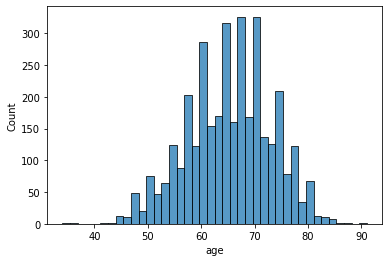

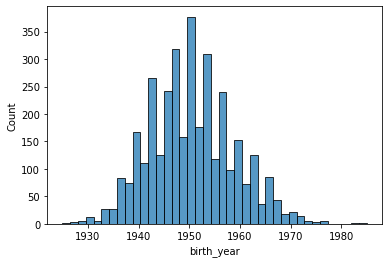

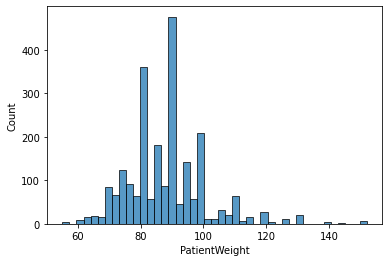

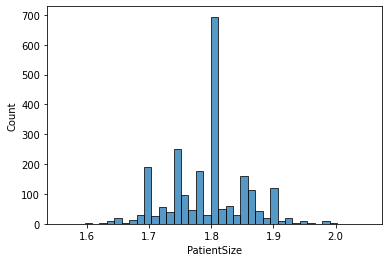

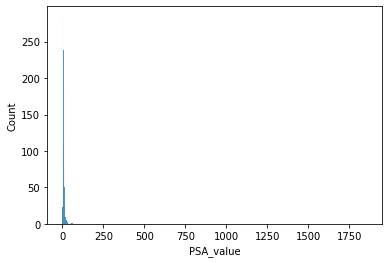

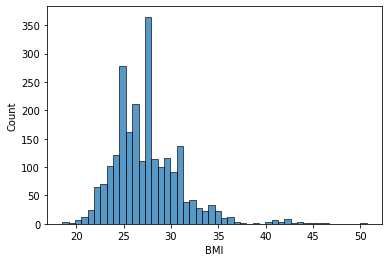

In [65]:
for feature in ["age", "birth_year", "PatientWeight", "PatientSize", "PSA_value", "BMI"]:
    print("\n", feature)
    print("min", np.nanmin(image_data_psa_bmi[feature].unique()))
    print("max", np.nanmax(image_data_psa_bmi[feature].unique()))
    plt.figure()
    sns.histplot(x=image_data_psa_bmi[feature])

# print(np.nanmin(image_data_psa_bmi['age'].unique()))
# print(np.nanmax(image_data_psa_bmi['age'].unique()))
# sns.histplot(x=image_data_psa_bmi['age'])

### Prepare features

In [66]:
features =  ["age", "age_prev", "age_prev_prev", "birth_year", "PatientWeight", "PatientSize", "PSA_value", "PSA_value_prev", "PSA_value_prev_prev", "BMI"]
table_features_missing = [f + "_MISSING" for f in features]

In [67]:
image_data_psa_bmi['PSA_value_clip'] = image_data_psa_bmi['PSA_value'].clip(0., 100.)
image_data_psa_bmi['PSA_value_clip'] = image_data_psa_bmi['PSA_value'].clip(0., 100.)

In [68]:
X = image_data_psa_bmi[features]

In [69]:
image_data_psa_bmi_missing = image_data_psa_bmi.copy()
for f in features:
    image_data_psa_bmi_missing.loc[image_data_psa_bmi_missing[f].isna(), f + '_MISSING'] = 1.0
image_data_psa_bmi_missing[features] = image_data_psa_bmi_missing[features].fillna(0)
image_data_psa_bmi_missing[table_features_missing] = image_data_psa_bmi_missing[table_features_missing].fillna(0)

In [70]:
image_data_psa_bmi_missing

,ALTA_ID_x,Befunddatum,StudyDate_x,File Origin,Typ,Anzahl MRT,Anzahl Biopsie,Gleason,Verwenden?,Klasse,...,age_MISSING,age_prev_MISSING,age_prev_prev_MISSING,birth_year_MISSING,PatientWeight_MISSING,PatientSize_MISSING,PSA_value_MISSING,PSA_value_prev_MISSING,PSA_value_prev_prev_MISSING,BMI_MISSING
0,223,20.01.09,2009-01-20,Ab_000223_200109_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,308,15.09.20,2020-09-15,mrpro2_000308_150920_0001.docx,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,786,26.10.20,2020-10-26,mrpro3_000786_261020_0001.docx,Verlaufs-MRT,2.0,1.0,6,ja,karzinom,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,892,17.09.12,2012-09-14,ab_000892_170912_0001.doc,Erste MRT,1.0,1.0,0,ja,chronische entzündung,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,926,10.09.14,2014-09-09,ab_000926_100914_0001.doc,Erste MRT,1.0,0.0,0,ja,tumorfrei (ohne bopsie),...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,31212,07.09.21,2021-07-09,mrpro3_031212_070921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3995,31251,13.09.21,2021-10-09,mrpro4_031251_130921_0001.docx,Erste MRT,1.0,1.0,7a,ja,karzinom + high grade pin,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3996,31256,14.09.21,2021-09-13,mrpro3_031256_140921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3997,31284,15.09.21,2021-09-15,mrpro4_031284_150921_0001.docx,Erste MRT,1.0,1.0,6,ja,karzinom,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
features

['age',
 'age_prev',
 'age_prev_prev',
 'birth_year',
 'PatientWeight',
 'PatientSize',
 'PSA_value',
 'PSA_value_prev',
 'PSA_value_prev_prev',
 'BMI']

In [72]:
image_data_psa_bmi_missing[features+table_features_missing]

,age,age_prev,age_prev_prev,birth_year,PatientWeight,PatientSize,PSA_value,PSA_value_prev,PSA_value_prev_prev,BMI,age_MISSING,age_prev_MISSING,age_prev_prev_MISSING,birth_year_MISSING,PatientWeight_MISSING,PatientSize_MISSING,PSA_value_MISSING,PSA_value_prev_MISSING,PSA_value_prev_prev_MISSING,BMI_MISSING
0,70.0,0.000000,0.000000,1939.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,80.0,0.000000,0.000000,1940.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.000000,0.000000,0.0,90.0,1.78,2.59,0.00,0.00,28.405504,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,66.0,66.172603,66.005479,1946.0,0.0,0.00,6.27,5.32,6.19,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.000000,0.000000,0.0,94.0,1.87,1.62,0.00,0.00,26.880952,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,64.0,0.000000,0.000000,1957.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3995,67.0,0.000000,0.000000,1954.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3996,59.0,0.000000,0.000000,1962.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3997,68.0,0.000000,0.000000,1953.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [75]:
image_data_psa_bmi_missing[image_data_psa_bmi_missing["PSA_value_prev_prev"] > 0.0][features]

,age,age_prev,age_prev_prev,birth_year,PatientWeight,PatientSize,PSA_value,PSA_value_prev,PSA_value_prev_prev,BMI
3,66.0,66.172603,66.005479,1946.0,0.0,0.00,6.27,5.32,6.19,0.000000
5,70.0,70.772603,70.449315,1944.0,65.0,1.65,7.23,7.81,6.24,23.875115
8,67.0,66.597260,66.515068,1951.0,89.0,1.80,4.26,3.70,4.80,27.469136
14,67.0,67.189041,67.158904,1952.0,85.0,1.80,4.83,3.72,2.93,26.234568
16,64.0,62.901370,62.701370,1948.0,90.0,1.85,26.20,18.47,18.09,26.296567
...,...,...,...,...,...,...,...,...,...,...
3810,63.0,63.416438,63.309589,1957.0,0.0,0.00,9.39,9.64,7.83,0.000000
3816,80.0,79.005479,77.591781,1940.0,0.0,0.00,13.36,7.64,6.10,0.000000
3818,71.0,70.452055,67.030137,1949.0,0.0,0.00,4.67,2.84,1.35,0.000000
3821,55.0,55.246575,53.991781,1965.0,0.0,0.00,5.94,6.72,6.20,0.000000


In [76]:
# image_data_psa_bmi_missing[features+table_features_missing][PSA_value_prev!=0.0]

NameError: name 'PSA_value_prev' is not defined

In [77]:
image_data_psa_bmi_missing.to_csv('/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/classes_with_dicoms_meta.csv', sep=';')


In [87]:
image_data_psa_bmi_missing[table_features_missing].all(axis=1).sum()

2

In [36]:
image_data_psa_bmi_missing[table_features_missing].all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998     True
Length: 3999, dtype: bool

In [37]:
image_data_psa_bmi_missing[table_features_missing].astype('bool')

,age_MISSING,age_prev_MISSING,birth_year_MISSING,PatientWeight_MISSING,PatientSize_MISSING,PSA_value_MISSING,PSA_value_prev_MISSING,BMI_MISSING
0,False,True,False,True,True,True,True,True
1,False,True,False,True,True,True,True,True
2,True,True,True,False,False,False,True,False
3,False,False,False,True,True,False,False,True
4,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...
3994,False,True,False,True,True,True,True,True
3995,False,True,False,True,True,True,True,True
3996,False,True,False,True,True,True,True,True
3997,False,True,False,True,True,True,True,True


In [38]:
for f in features:
    f_missing = f + "_MISSING"
    if f_missing in image_data_psa_bmi_missing.columns:
        mask = image_data_psa_bmi_missing[f_missing].astype('bool')
        mean = image_data_psa_bmi_missing[f][~mask].mean()
        std = image_data_psa_bmi_missing[f][~mask].std()
    else:
        mean = image_data_psa_bmi_missing[f].mean()
        std = image_data_psa_bmi_missing[f].std()
        print(f, mean, std)

In [91]:
image_data_psa_bmi_missing.to_csv('/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/classes_with_dicoms_meta.csv', sep=';')


In [39]:
for f in features:
    print(f"Missing features: {f} {image_data_psa_bmi[f].isna().sum()} out of {len(image_data_psa_bmi)}, \
          {(image_data_psa_bmi[f].isna().sum()/len(image_data_psa_bmi))*100}")

Missing features: age 463 out of 3999,           11.577894473618406
Missing features: age_prev 1089 out of 3999,           27.231807951987996
Missing features: birth_year 463 out of 3999,           11.577894473618406
Missing features: PatientWeight 1660 out of 3999,           41.5103775943986
Missing features: PatientSize 1660 out of 3999,           41.5103775943986
Missing features: PSA_value 841 out of 3999,           21.030257564391096
Missing features: PSA_value_prev 1089 out of 3999,           27.231807951987996
Missing features: BMI 1660 out of 3999,           41.5103775943986


In [40]:
df = pd.DataFrame()
for col in features:
    image_data_psa_bmi[image_data_psa_bmi]
    print(col)


ValueError: Boolean array expected for the condition, not int64

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
new_columns = ["scaled_" + c for c in X.columns]
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=new_columns)
print(new_columns)

['scaled_age', 'scaled_birth_year', 'scaled_PatientWeight', 'scaled_PatientSize', 'scaled_PSA_value_clip', 'scaled_BMI']


In [187]:
image_data_psa_bmi = pd.concat([image_data_psa_bmi, scaled_features_df], axis=1)
image_data_psa_bmi.to_csv('/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/classes_with_dicoms_meta_prev_prev.csv', sep=';')


In [ ]:
df = pd.Dataframe()
# for col in scaled_features_df.columns:
#     print()


In [190]:
# scaled_features_df
no_missing = scaled_features_df[~scaled_features_df[new_columns].isnull().any(axis=1)]

In [39]:
from monai.data import CSVDataset
# 
csv_data = CSVDataset('/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/classes_with_dicoms_meta.csv',
                      col_groups={"tabular_features": ["PSA_value_clip", "PSA_value_MISSING"]},
                      kwargs_read_csv = {"sep": ';'})




/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
csv_data[0]

{'Unnamed: 0': 0,
 'ALTA_ID_x': 223,
 'Befunddatum': '20.01.09',
 'StudyDate_x': '2009-01-20',
 'File Origin': 'Ab_000223_200109_0001.doc',
 'Typ': 'Erste MRT',
 'Anzahl MRT': 1.0,
 'Anzahl Biopsie': 0.0,
 'Gleason': '0',
 'Verwenden?': 'ja',
 'Klasse': 'tumorfrei (ohne bopsie)',
 'Histobefund': nan,
 'weitere Info': nan,
 'Info': nan,
 'Beurteilung': nan,
 'Beurteilungdisease': 'Hyperplasia',
 'Empfehlung': nan,
 'relative_path': '000000000223/20090120',
 'ALTA_ID': 223,
 'ContrastBolusAgent': "('mit Kontrast', 'mit Kontrast', 'mit Kontrast', None, 'mit Kontrast', None, None, None, None)",
 'DICOM_ID': '223-06',
 'FileCount': '[240, 288, 19, 15, 5, 16, 19, 15, 45]',
 'InstitutionName': "('Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani', 'Dr. med. A. Lumiani')",
 'Manufacturer': "['siemens', 'siemens', 'siemens', 'siemens', 'siemens', 'siemens', 'siemens

In [44]:
import pickle

In [45]:
pickle_path = "/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/preprocessed_meta/img_mode/fold_ids_seed_42_str.pickle"
with open(pickle_path, 'rb') as handle:
    pkl = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: '/data/oleksii/datasets/ALTA-Lesions-Dataset/classification/preprocessed_meta/img_mode/fold_ids_seed_42_str.pickle'

In [43]:
len(pkl['train_data']['split_train'])

NameError: name 'pkl' is not defined